## **Import Library**

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np 
import pandas as pd 

from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler,QuantileTransformer,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


## **Data Loading**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1TTQBnuc2Wtg0dH7v3xUH6BAnocf1SU0QEJAZKQVZXHs/export?format=csv&id=1TTQBnuc2Wtg0dH7v3xUH6BAnocf1SU0QEJAZKQVZXHs&gid=0"

df = pd.read_csv(url, skiprows=1)
display(df.head())

,Unnamed: 0,CustomerID,Age,Gender,Location,TenureMonths,PlanType,PaymentMethod,MonthlyCharges,TotalCharges,MoviesWatched,SongsListened,AvgSessionDuration,SupportTickets,Rating,Churn
0,NaN,1,32,Male,Jakarta,12,Premium,CreditCard,25,300,20,50,60,1,4,0
1,NaN,2,25,Female,Surabaya,3,Basic,E-Wallet,10,30,5,10,30,0,3,1
2,NaN,3,45,Male,Bandung,24,Standard,BankTransfer,18,432,15,30,45,2,5,0
3,NaN,4,28,Female,Medan,6,Basic,CreditCard,12,72,8,15,35,1,2,1
4,NaN,5,38,Male,Yogyakarta,18,Standard,E-Wallet,20,360,18,40,50,0,4,0


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          30 non-null     int64 
 1   Age                 30 non-null     int64 
 2   Gender              30 non-null     object
 3   Location            30 non-null     object
 4   TenureMonths        30 non-null     int64 
 5   PlanType            30 non-null     object
 6   PaymentMethod       30 non-null     object
 7   MonthlyCharges      30 non-null     int64 
 8   TotalCharges        30 non-null     int64 
 9   MoviesWatched       30 non-null     int64 
 10  SongsListened       30 non-null     int64 
 11  AvgSessionDuration  30 non-null     int64 
 12  SupportTickets      30 non-null     int64 
 13  Rating              30 non-null     int64 
 14  Churn               30 non-null     int64 
dtypes: int64(11), object(4)
memory usage: 3.6+ KB


None

,CustomerID,Age,Gender,Location,TenureMonths,PlanType,PaymentMethod,MonthlyCharges,TotalCharges,MoviesWatched,SongsListened,AvgSessionDuration,SupportTickets,Rating,Churn
0,1,32,Male,Jakarta,12,Premium,CreditCard,25,300,20,50,60,1,4,0
1,2,25,Female,Surabaya,3,Basic,E-Wallet,10,30,5,10,30,0,3,1
2,3,45,Male,Bandung,24,Standard,BankTransfer,18,432,15,30,45,2,5,0
3,4,28,Female,Medan,6,Basic,CreditCard,12,72,8,15,35,1,2,1
4,5,38,Male,Yogyakarta,18,Standard,E-Wallet,20,360,18,40,50,0,4,0


In [ ]:
df.to_csv('dataset.csv', index=False)

# df = pd.read_csv('dataset.csv')
# display(df.head())

## **Trends in user behavior**

/tmp/ipykernel_7066/362622199.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(['Retained', 'Churned'])
/tmp/ipykernel_7066/362622199.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(['Retained', 'Churned'])
/tmp/ipykernel_7066/362622199.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(['Retained', 'Churned'])
/tmp/ipykernel_7066/362622199.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(['Retained', 'Churned'])


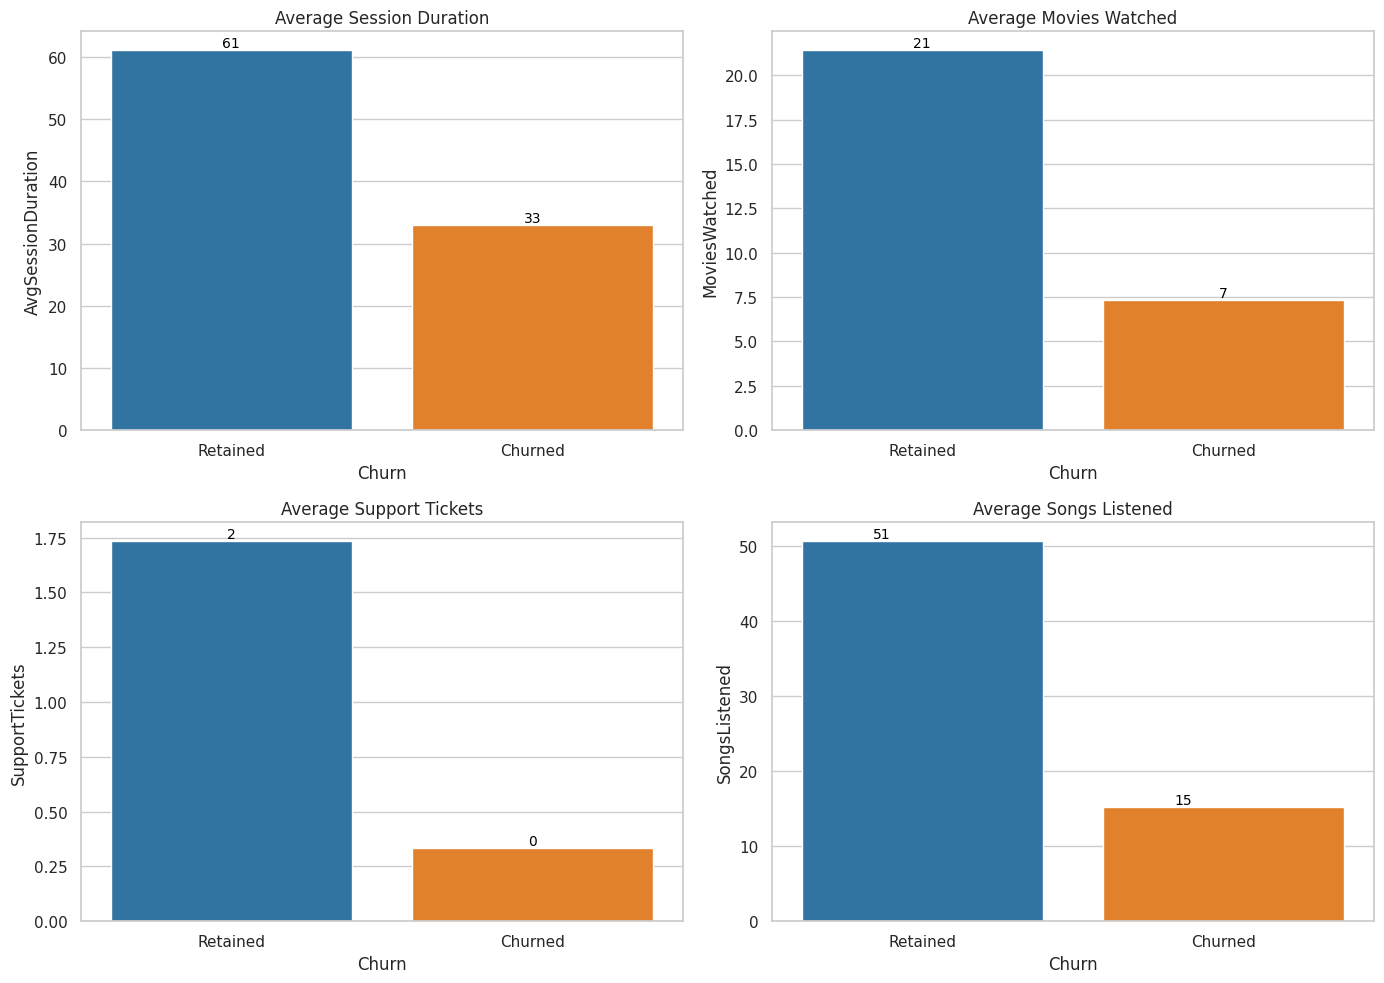

In [24]:
# Set tema seaborn
sns.set(style="whitegrid")

# Buat figure dengan 3 subplot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
palette = "tab10"
# 1. Rata-rata Durasi Sesi
sns.barplot(data=df, x='Churn', y='AvgSessionDuration', ci=None, ax=axs[0, 0], palette=palette)
axs[0, 0].set_title("Average Session Duration")
axs[0, 0].set_xticklabels(['Retained', 'Churned'])

for p in axs[0, 0].patches:
    axs[0, 0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

# 2. Rata-rata Film yang Ditonton
sns.barplot(data=df, x='Churn', y='MoviesWatched', ci=None, ax=axs[0, 1], palette=palette)
axs[0, 1].set_title("Average Movies Watched")
axs[0, 1].set_xticklabels(['Retained', 'Churned'])

for p in axs[0, 1].patches:
    axs[0, 1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

# 3. Rata-rata Tiket Dukungan
sns.barplot(data=df, x='Churn', y='SupportTickets', ci=None, ax=axs[1, 0], palette=palette)
axs[1, 0].set_title("Average Support Tickets")
axs[1, 0].set_xticklabels(['Retained', 'Churned'])

for p in axs[1, 0].patches:
    axs[1, 0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')
    
# 4. Rata-rata Tiket Dukungan
sns.barplot(data=df, x='Churn', y='SongsListened', ci=None, ax=axs[1, 1], palette=palette)
axs[1, 1].set_title("Average Songs Listened")
axs[1, 1].set_xticklabels(['Retained', 'Churned'])

for p in axs[1, 1].patches:
    axs[1, 1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 3., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

## **Variables Correlation with Churn**

In [5]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
# Ubah ke dalam dataframe
numerical_df = pd.DataFrame(df[numerical_columns])

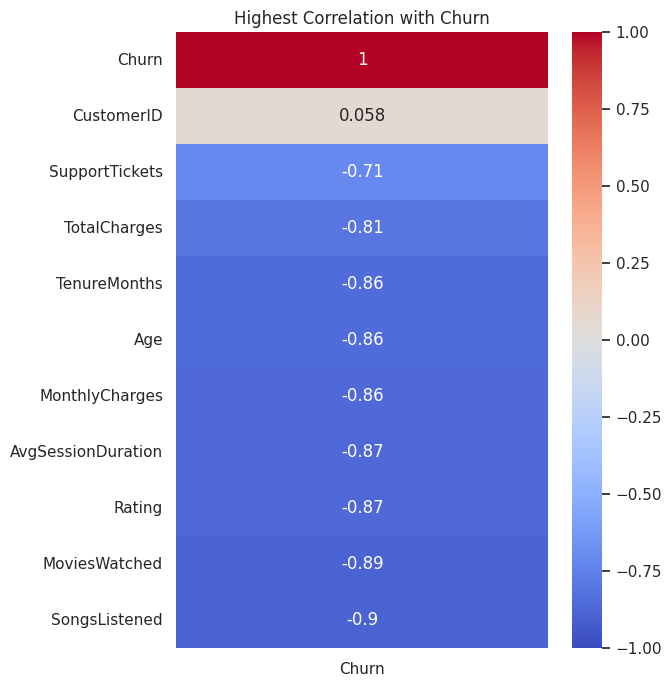

In [6]:
# Hitung korelasi antar kolom numerik
correlation = numerical_df.corr()

# Fokus pada korelasi dengan Churn
churn_corr = correlation[['Churn']].sort_values(by='Churn', ascending=False)

# Plot heatmap korelasi dengan Churn
plt.figure(figsize=(6, 8))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Highest Correlation with Churn")
plt.show()

## **Group Customer Segments Based on usage and tenure**

In [7]:
df_segments = df[['TenureMonths', 'AvgSessionDuration']]
df_segments.head()

,TenureMonths,AvgSessionDuration
0,12,60
1,3,30
2,24,45
3,6,35
4,18,50


In [8]:
scaler = StandardScaler()
features_scaled_array = scaler.fit_transform(df_segments)
features_scaled = pd.DataFrame(features_scaled_array, columns=df_segments.columns)
# Balance the data
quantile_transformer = QuantileTransformer(output_distribution="normal")
features_scaled = quantile_transformer.fit_transform(features_scaled)

/home/noir/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (30). n_quantiles is set to n_samples.
  warnings.warn(


In [9]:
# Clustering dengan KMeans (3 segmen)
kmeans = KMeans(n_clusters=3, random_state=42)
df_segments['Segment'] = kmeans.fit_predict(features_scaled)

/tmp/ipykernel_7066/3255595638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segments['Segment'] = kmeans.fit_predict(features_scaled)


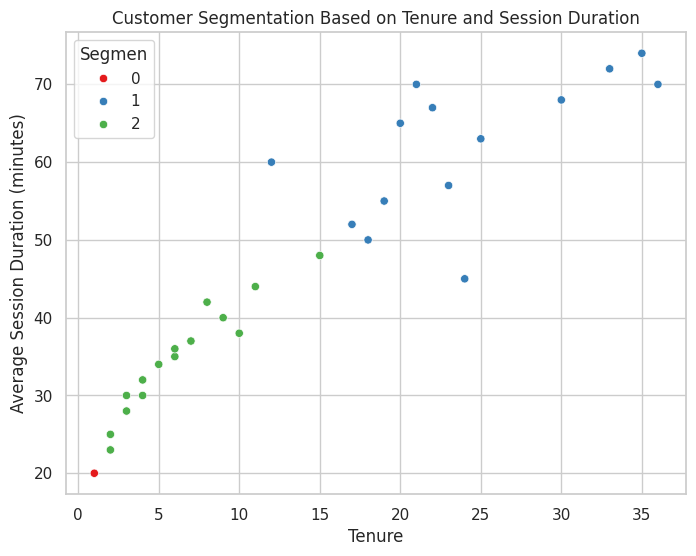

In [10]:
# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_segments, x='TenureMonths', y='AvgSessionDuration', hue='Segment', palette='Set1')
plt.title('Customer Segmentation Based on Tenure and Session Duration')
plt.xlabel('Tenure')
plt.ylabel('Average Session Duration (minutes)')
plt.legend(title='Segmen')
plt.show()

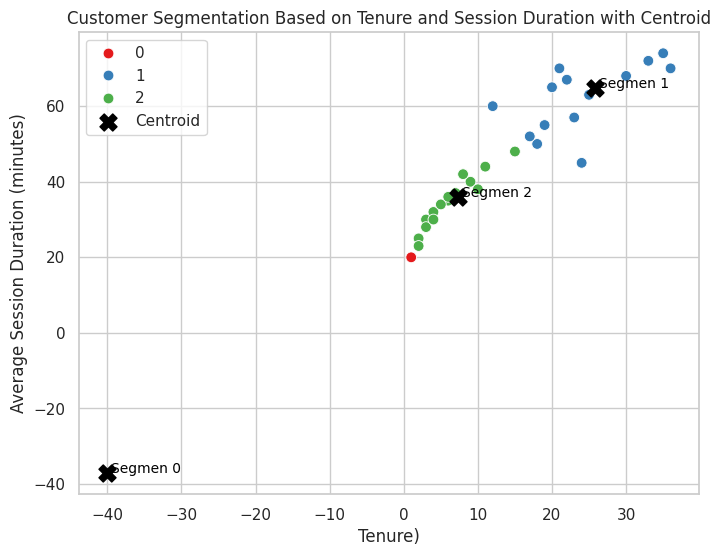

In [11]:
# Tambahkan centroid ke plot
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_segments, x='TenureMonths', y='AvgSessionDuration', hue='Segment', palette='Set1', s=60)

# Tambahkan titik centroid
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='black', marker='X', label='Centroid')

# Anotasi segmen
for i, (x, y) in enumerate(centroids):
    plt.text(x+0.5, y, f"Segmen {i}", fontsize=10, color='black')

plt.title('Customer Segmentation Based on Tenure and Session Duration with Centroid')
plt.xlabel('Tenure)')
plt.ylabel('Average Session Duration (minutes)')
plt.legend()
plt.show()

In [12]:
model_df = df.copy()
model_df.drop('CustomerID', axis=1, inplace=True)
model_df.head()

,Age,Gender,Location,TenureMonths,PlanType,PaymentMethod,MonthlyCharges,TotalCharges,MoviesWatched,SongsListened,AvgSessionDuration,SupportTickets,Rating,Churn
0,32,Male,Jakarta,12,Premium,CreditCard,25,300,20,50,60,1,4,0
1,25,Female,Surabaya,3,Basic,E-Wallet,10,30,5,10,30,0,3,1
2,45,Male,Bandung,24,Standard,BankTransfer,18,432,15,30,45,2,5,0
3,28,Female,Medan,6,Basic,CreditCard,12,72,8,15,35,1,2,1
4,38,Male,Yogyakarta,18,Standard,E-Wallet,20,360,18,40,50,0,4,0


## **New Features to improve prediction**

In [13]:
model_df["EngagementScore"] = model_df["MoviesWatched"] + model_df["SongsListened"]
model_df["AvgSpendPerMonth"] = model_df["TotalCharges"] / model_df["TenureMonths"]
model_df["IsLongTerm"] = model_df["TenureMonths"].apply(lambda x: 1 if x >= 12 else 0)
model_df.head()

,Age,Gender,Location,TenureMonths,PlanType,PaymentMethod,MonthlyCharges,TotalCharges,MoviesWatched,SongsListened,AvgSessionDuration,SupportTickets,Rating,Churn,EngagementScore,AvgSpendPerMonth,IsLongTerm
0,32,Male,Jakarta,12,Premium,CreditCard,25,300,20,50,60,1,4,0,70,25.0,1
1,25,Female,Surabaya,3,Basic,E-Wallet,10,30,5,10,30,0,3,1,15,10.0,0
2,45,Male,Bandung,24,Standard,BankTransfer,18,432,15,30,45,2,5,0,45,18.0,1
3,28,Female,Medan,6,Basic,CreditCard,12,72,8,15,35,1,2,1,23,12.0,0
4,38,Male,Yogyakarta,18,Standard,E-Wallet,20,360,18,40,50,0,4,0,58,20.0,1


## **Modelling for Churn Predict**

In [14]:
categorical_features = model_df.select_dtypes(include=['object']).columns

label_encoders = {}
encoder = LabelEncoder()
for col in categorical_features:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col])
    label_encoders[col] = le

In [15]:
# Memisahkan fitur dan target
X = model_df.drop('Churn', axis=1)
y = model_df['Churn']

In [16]:
scaler = StandardScaler()
featuresClassification_scaled_array = scaler.fit_transform(X)
featuresClassification_scaled = pd.DataFrame(featuresClassification_scaled_array, columns=X.columns)
# Balance the data
quantile_transformer = QuantileTransformer(output_distribution="normal")
featuresClassification_scaled = quantile_transformer.fit_transform(featuresClassification_scaled)

/home/noir/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (30). n_quantiles is set to n_samples.
  warnings.warn(


In [17]:
X_train, X_test, y_train, y_test = train_test_split(featuresClassification_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [18]:
rf = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



## **Predict**

In [19]:
churn_prediction = rf.predict(featuresClassification_scaled)

X_inverse_quantile = quantile_transformer.inverse_transform(featuresClassification_scaled)
X_inverse_scaler = scaler.inverse_transform(X_inverse_quantile)
X_inverse_df = pd.DataFrame(X_inverse_scaler, columns=X.columns)

for col in categorical_features:
    le = label_encoders[col]
    X_inverse_df[col] = le.inverse_transform(X_inverse_df[col].astype(int))

# Simpan hasil ke dalam dataframe
result_df = pd.DataFrame(X_inverse_df, columns=X_inverse_df.columns)  # dari sebelum scaling
result_df['PredictedChurn'] = churn_prediction
result_df.head()

/home/noir/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Age,Gender,Location,TenureMonths,PlanType,PaymentMethod,MonthlyCharges,TotalCharges,MoviesWatched,SongsListened,AvgSessionDuration,SupportTickets,Rating,EngagementScore,AvgSpendPerMonth,IsLongTerm,PredictedChurn
0,32.0,Male,Jakarta,12.0,Premium,CreditCard,25.0,300.0,20.0,50.0,60.0,1.0,4.0,70.0,25.0,1.0,0
1,25.0,Female,Surabaya,3.0,Basic,E-Wallet,10.0,30.0,5.0,10.0,30.0,0.0,3.0,15.0,10.0,0.0,1
2,45.0,Male,Bandung,24.0,Standard,BankTransfer,18.0,432.0,15.0,30.0,45.0,2.0,5.0,45.0,18.0,1.0,0
3,28.0,Female,Medan,6.0,Basic,CreditCard,12.0,72.0,8.0,15.0,35.0,1.0,2.0,23.0,12.0,0.0,1
4,38.0,Male,Yogyakarta,18.0,Standard,E-Wallet,20.0,360.0,18.0,40.0,50.0,0.0,4.0,58.0,20.0,1.0,0


In [20]:
df['ChurnPrediction'] = churn_prediction
df.head()

,CustomerID,Age,Gender,Location,TenureMonths,PlanType,PaymentMethod,MonthlyCharges,TotalCharges,MoviesWatched,SongsListened,AvgSessionDuration,SupportTickets,Rating,Churn,ChurnPrediction
0,1,32,Male,Jakarta,12,Premium,CreditCard,25,300,20,50,60,1,4,0,0
1,2,25,Female,Surabaya,3,Basic,E-Wallet,10,30,5,10,30,0,3,1,1
2,3,45,Male,Bandung,24,Standard,BankTransfer,18,432,15,30,45,2,5,0,0
3,4,28,Female,Medan,6,Basic,CreditCard,12,72,8,15,35,1,2,1,1
4,5,38,Male,Yogyakarta,18,Standard,E-Wallet,20,360,18,40,50,0,4,0,0


## **Feature Importance**

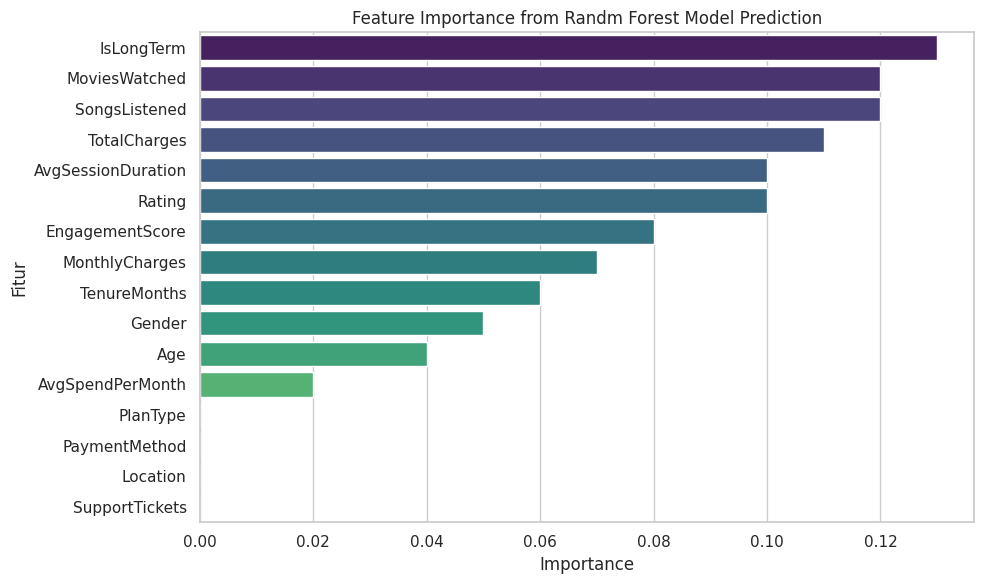

In [21]:
importances = rf.feature_importances_
feature_names = X.columns

# Buat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance from Randm Forest Model Prediction")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()